# Static Portfolio Optimisation
Inspired by Kevin Vecmanis's Engineering + Data Science website. The code has been adaptated by removing redandunt packages, fixing bugs, modifying optimisation, etc. 


In [1]:
#import pandas_datareader as pdr
import datetime
import yfinance as yf
import scipy.optimize as optimize
import scipy.interpolate as sci
import scipy as scip
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time 
import pandas as pd
import sys
#import xlrd as exl   #Excel suport. Only xls not xlsx or xlsm
print ("system \t- ", sys.version)
print ("pandas \t- ", pd.__version__)
print ("pyplot \t- ", mpl.__version__)
print("scipy \t- ",scip.__version__)
print("YF \t- ",yf.__version__)
print("numpy \t- ",np.__version__)
#print("xlrd \t- ",exl.__version__)


system 	-  3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
pandas 	-  2.2.3
pyplot 	-  3.10.1
scipy 	-  1.15.2
YF 	-  0.2.65
numpy 	-  1.26.3


In [2]:
Mode = "yf" # Mode = "yf" for Yahoo Finance or Mode = "APRA" for Excel



In [3]:
# portfolio data using APRA indexes
if Mode == "APRA":
    df = pd.read_excel('BBG Data (2000-2025).xlsx')
    df.info()
else: 
    df=0

In [4]:
if Mode == "APRA" :
    start = datetime.datetime(2012, 1, 1) 
    end = datetime.datetime(2017, 1, 1)
    df = df[(df['Dates'] >= start) & (df['Dates'] <= end)]
    df.info() 
else:
    start = datetime.datetime(2015, 1, 1) 
    end = datetime.datetime(2016, 1, 1)
    


In [5]:
if Mode == "APRA" :
    df.set_index('Dates',inplace=True, drop=True)
    df.info()


In [6]:
#print(list(df))
#print(features)
#print(stocks)

In [7]:
# create list of indexes (stocks)
if Mode == "APRA" :
    features = [f for f in list(df)] 
    features = features[0:9]
    stocks = features
    df=df
    print("stocks/indexes", stocks,"\n\n")


In [8]:
#For Yahoo finance only, skip for Excel
if Mode == "yf":
    stocks = ['CBA.AX','WBC.AX','NAB.AX','ANZ.AX','MQG.AX']

    start = datetime.datetime(2023, 1, 1)
    end = datetime.datetime(2024, 1, 1)

    


In [9]:
# Portfolio data retrieved from Yahoo Finance (skip for Excel)
if Mode == "yf":
    #df = yf.download(stocks[:5],start, end)["Adj Close"]

    
    df = yf.download(stocks,  start=start, end=end, multi_level_index = False)['Close'] #["Adj Close"]

    df.head()

    features = [f for f in list(df)] 
adj_closes = df
df.info()


C:\Users\igeni\AppData\Local\Temp\ipykernel_22484\1781504856.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stocks,  start=start, end=end, multi_level_index = False)['Close'] #["Adj Close"]
[*********************100%***********************]  5 of 5 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANZ.AX  252 non-null    float64
 1   CBA.AX  252 non-null    float64
 2   MQG.AX  252 non-null    float64
 3   NAB.AX  252 non-null    float64
 4   WBC.AX  252 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [10]:
df

Ticker,ANZ.AX,CBA.AX,MQG.AX,NAB.AX,WBC.AX
Date,,,,,
2023-01-03,19.695929,90.502457,150.280563,25.837072,19.613815
2023-01-04,20.226631,92.374290,155.026169,26.082972,20.226479
2023-01-05,20.218071,92.535507,156.988297,26.293745,20.252367
2023-01-06,20.260870,92.410110,157.389862,26.135664,20.191963
2023-01-09,20.303669,92.535507,158.886551,26.346437,20.166075
...,...,...,...,...,...
2023-12-21,23.758709,103.511375,172.490356,28.431816,21.075506
2023-12-22,23.731115,103.455193,171.720016,28.347864,21.066280
2023-12-27,23.749512,104.101212,173.736237,28.459801,21.103174


Print Stock Daily Returns


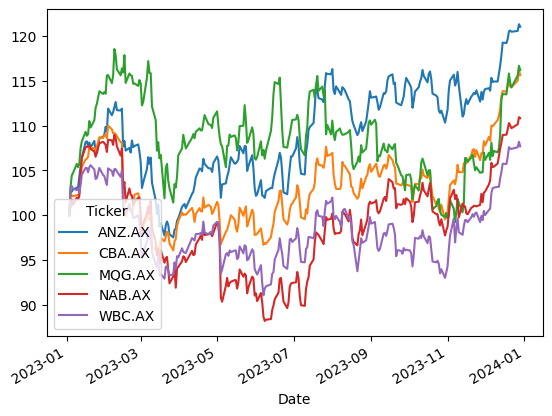

In [11]:
# Plot stock or index returns from inseption
if Mode == "yf":
    print("Print Stock Daily Returns")
    (adj_closes/adj_closes.iloc[0]*100).plot()



Calculate daily  returns


<Axes: xlabel='Date'>

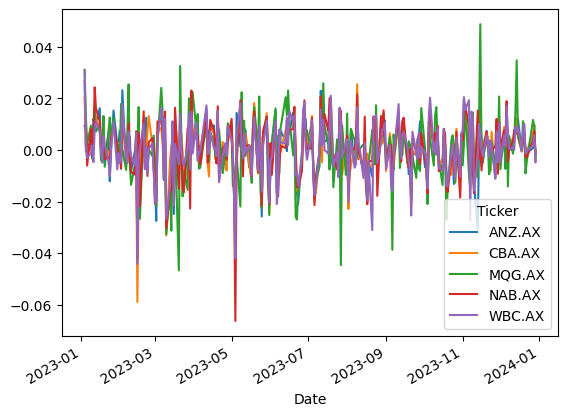

In [12]:
if Mode == 'yf':
    print("Calculate daily  returns")
    returns = np.log(adj_closes/adj_closes.shift(1))
else :
    print("Calculate monthly returns")
    returns = adj_closes 
returns.plot()




In [13]:
print(returns.mean(numeric_only=True))

Ticker
ANZ.AX    0.000761
CBA.AX    0.000580
MQG.AX    0.000598
NAB.AX    0.000410
WBC.AX    0.000295
dtype: float64


In [14]:
if Mode == 'yf':
    print("Annualised daily average returns \n",returns.mean(numeric_only=True)* 252)
else:
    print("Annualised monthly average returns \n",returns.mean(numeric_only=True)* 12)        


Annualised daily average returns 
 Ticker
ANZ.AX    0.191777
CBA.AX    0.146037
MQG.AX    0.150820
NAB.AX    0.103300
WBC.AX    0.074358
dtype: float64


In [15]:
if Mode == 'yf':
    print("Annualised daily cov matrix \n\n",returns.cov(numeric_only=True)* 252)
else:
    print("Annualised montly cov matrix \n\n",returns.cov(numeric_only=True)* 12)  




Annualised daily cov matrix 

 Ticker    ANZ.AX    CBA.AX    MQG.AX    NAB.AX    WBC.AX
Ticker                                                  
ANZ.AX  0.025175  0.018835  0.019483  0.021395  0.021910
CBA.AX  0.018835  0.023251  0.015141  0.021508  0.020970
MQG.AX  0.019483  0.015141  0.042047  0.018792  0.018010
NAB.AX  0.021395  0.021508  0.018792  0.031942  0.024769
WBC.AX  0.021910  0.020970  0.018010  0.024769  0.028363


In [16]:
print(features)

['ANZ.AX', 'CBA.AX', 'MQG.AX', 'NAB.AX', 'WBC.AX']


In [17]:
print("Randomly created portfolio weights \n\n")
num_assets = len(features)
weights = np.random.dirichlet(np.ones(num_assets), size=1)
weights = weights[0]
print(weights)

Randomly created portfolio weights 


[0.11492583 0.0563037  0.69339056 0.11256745 0.02281246]


In [18]:
if Mode == 'yf':
    print("Expected randomised portfolio return \n\n")
    Expected_port_return = np.sum(returns.mean()*weights)*252
    print(Expected_port_return)
else:
    print("Expected randomised portfolio return \n\n")
    Expected_port_return = np.sum(returns.mean()*weights)*12
    print(Expected_port_return)


Expected randomised portfolio return 


0.14816399071646688


In [19]:
print("Randomised portfolio variance and volatility (risk) \n\n")
if Mode == 'yf':
    port_var = np.dot(weights.T, np.dot(returns.cov()*252, weights))
else:    
    port_var = np.dot(weights.T, np.dot(returns.cov()*12, weights))
    
port_vol = np.sqrt(port_var)
print(port_var)
print(port_vol)

Randomised portfolio variance and volatility (risk) 


0.030198194559622627
0.17377627732122308


In [20]:
def portfolio_simulation(assets, iterations):
    '''
    Runs a number of simulations by randomly selecting portfolio weights using dirichlet disctribution, 
    returns the list of portfolio returns and volatilities and plots all portfolios.
    
    Parameters:
    -----------  
        assets: list
            all attainable assets.    
        iterations: int 
            the number of randomly (dirichlet distribution) generated portfolios.
    
    Global Variables:
    -----------------
        adj_closes
    Returns:
    --------
        port_returns: array
            array of all simulated portfolio returns.
        port_vols: array
            array of all simulated portfolio standard deviations (risk).
    '''
    print("start simulation")
    start_time = time.time()

    num_assets = len(assets)
    print("assets - " , num_assets)
    print("Start - ", start)
    print("End - ", end)
    print(features)
    
    if Mode == 'yf':
        returns = np.log(adj_closes / adj_closes.shift(1))
    else:    
        returns = adj_closes
    
    port_returns = []
    port_vols = []
    
    for i in range (iterations):
        weights = np.random.dirichlet(np.ones(num_assets),size=1)
        weights = weights[0]
        if Mode == 'yf':    
            port_returns.append(np.sum(returns.mean() * weights) * 252)
            port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))))
        else:
            port_returns.append(np.sum(returns.mean() * weights) * 12)
            port_vols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 12, weights))))



    # Convert lists to arrays
    port_returns = np.array(port_returns)
    port_vols = np.array(port_vols)
 
    
    # Plot the distribution of portfolio returns and volatilities 
    plt.figure(figsize = (18,10))
    plt.scatter(port_vols,port_returns,c = (port_returns / port_vols), marker='o')
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label = 'Sharpe ratio (not adjusted for short rate)')



    print('Elapsed Time: %.2f seconds' % (time.time() - start_time))
    
    return port_returns, port_vols

start simulation
assets -  5
Start -  2023-01-01 00:00:00
End -  2024-01-01 00:00:00
['ANZ.AX', 'CBA.AX', 'MQG.AX', 'NAB.AX', 'WBC.AX']


Elapsed Time: 1.05 seconds


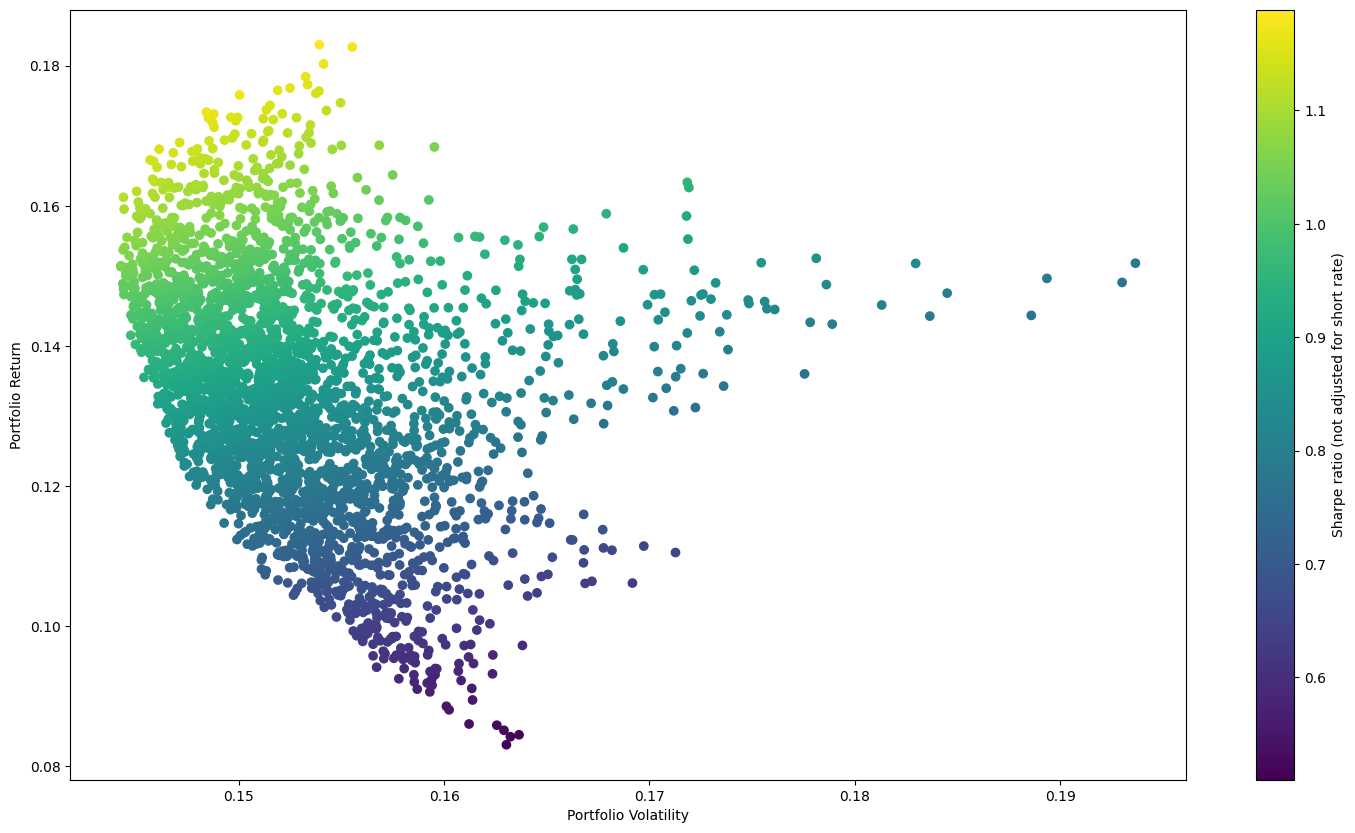

In [21]:
port_returns, port_vols = portfolio_simulation(features, 3000) #3000 assets
#plt.plot(port_vols)
#print(max(port_vols))

Sharpe Ratio: Risk adjusted returns. Creates the portfolio with the highest return per unit of risk.
Variance (risk): Create the portfolio with the lowest risk
Return: Create the portfolio with the highest return.

In [22]:
def portfolio_stats(weights, returns):
    
    '''
    We can gather the portfolio performance metrics for a specific set of weights.
    This function will be important because we'll want to pass it to an optmization
    function to get the portfolio with the best desired characteristics.
    
    Note: Sharpe ratio here uses a risk-free short rate of 0.
    
    Paramaters: 
    -----------
        weights: array, 
            asset weights in the portfolio.
        returns: dataframe
            a dataframe of returns for each asset in the trial portfolio    
    
    Returns: 
    --------
        dict of portfolio statistics - mean return, volatility, sharp ratio.
    '''

    # Convert to array in case list was passed instead.
    weights = np.array(weights)
    if Mode == 'yf':
        port_return = np.sum(returns.mean() * weights) * 252
        port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    else: 
        port_return = np.sum(returns.mean() * weights) * 12
        port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 12, weights)))

    
    sharpe = port_return/port_vol

    return {'return': port_return, 'volatility': port_vol, 'sharpe': sharpe}


In [23]:
def minimize_sharpe(weights):  
    return -portfolio_stats(weights, returns)['sharpe'] 

def minimize_volatility(weights):  
    # Note that we don't return the negative of volatility here because we 
    # want the absolute value of volatility to shrink, unlike sharpe.
    return portfolio_stats(weights, returns)['volatility'] 

def minimize_return(weights): 
    return -portfolio_stats(weights, returns)['return']

In [24]:
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
#bounds = [(0.1, .9), (0.1, .9), (0.1, .9), (0.1, .9), (0.1, .9), (0.1, .9)]
initializer = num_assets * [1./num_assets,]

print (initializer)
print (bounds)

[0.2, 0.2, 0.2, 0.2, 0.2]
((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


In [25]:
minimize_sharpe(initializer)

-0.8964704973252947

In [26]:

optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)
print(optimal_sharpe)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.2090488463827003
       x: [ 9.536e-01  3.557e-02  1.085e-02  5.638e-17  9.129e-17]
     nit: 6
     jac: [-3.031e-05  6.086e-04  5.689e-04  3.917e-01  5.989e-01]
    nfev: 37
    njev: 6


In [27]:
optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(stocks,list(optimal_sharpe_weights))) #assets

[('CBA.AX', 0.9536),
 ('WBC.AX', 0.0356),
 ('NAB.AX', 0.0109),
 ('ANZ.AX', 0.0),
 ('MQG.AX', 0.0)]

In [28]:
optimal_stats = portfolio_stats(optimal_sharpe_weights,returns)
print(optimal_stats)

print('Optimal Portfolio Return: ', round(optimal_stats['return']*100,4))
print('Optimal Portfolio Volatility: ', round(optimal_stats['volatility']*100,4))
print('Optimal Portfolio Sharpe Ratio: ', round(optimal_stats['sharpe'],4))

{'return': 0.18972099519853244, 'volatility': 0.15691756073858845, 'sharpe': 1.209048842625025}
Optimal Portfolio Return:  18.9721
Optimal Portfolio Volatility:  15.6918
Optimal Portfolio Sharpe Ratio:  1.209


 ###The Efficient Frontier###

In [29]:
optimal_variance=optimize.minimize(minimize_volatility,
                                   initializer,
                                   method = 'SLSQP',
                                   bounds = bounds,
                                   constraints = constraints)

print(optimal_variance)
optimal_variance_weights=optimal_variance['x'].round(4)
list(zip(stocks,list(optimal_variance_weights))) #assets

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.14390067516807792
       x: [ 2.829e-01  5.560e-01  1.611e-01  3.198e-18  0.000e+00]
     nit: 9
     jac: [ 1.441e-01  1.438e-01  1.439e-01  1.462e-01  1.443e-01]
    nfev: 54
    njev: 9


[('CBA.AX', 0.2829),
 ('WBC.AX', 0.556),
 ('NAB.AX', 0.1611),
 ('ANZ.AX', 0.0),
 ('MQG.AX', 0.0)]

In [30]:
# Make an array of 50 returns betweeb the minimum return and maximum return
# discovered earlier.
target_returns = np.linspace(port_returns.min(),port_returns.max(),50)

# Initialize optimization parameters
minimal_volatilities = []
bounds = tuple((0,1) for x in weights)
initializer = num_assets * [1./num_assets,]

for target_return in target_returns:
    
    constraints = ({'type':'eq','fun': lambda x: portfolio_stats(x,returns)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1})
       
    optimal = optimize.minimize(minimize_volatility,
                              initializer,
                              method = 'SLSQP',
                              bounds = bounds,
                              constraints = constraints)
    
    minimal_volatilities.append(optimal['fun'])

minimal_volatilities = np.array(minimal_volatilities)

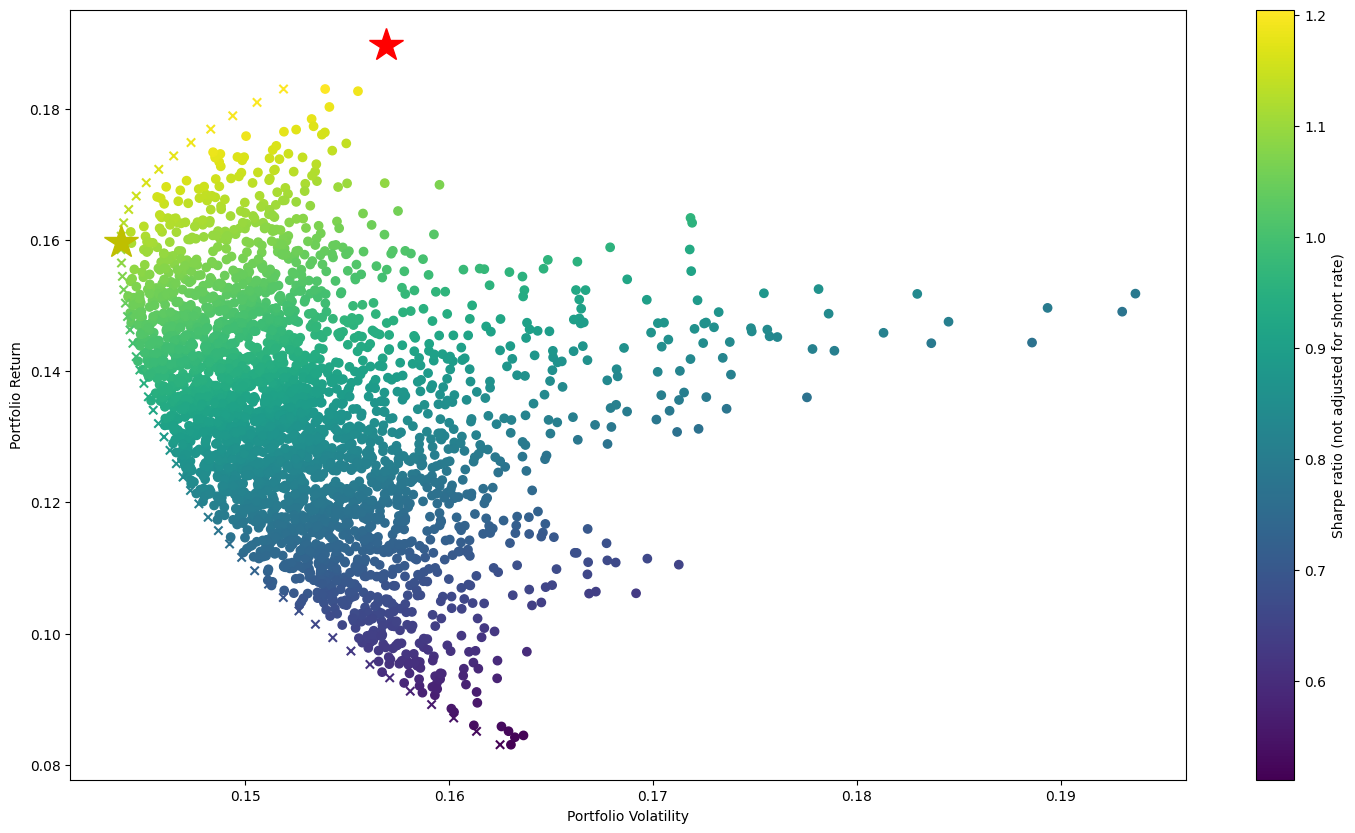

In [31]:

# initialize figure size
plt.figure(figsize=(18,10))

plt.scatter(port_vols,
            port_returns,
            c = (port_returns / port_vols),
            marker = 'o')

plt.scatter(minimal_volatilities,
            target_returns,
            c = (target_returns / minimal_volatilities),
            marker = 'x')

plt.plot(portfolio_stats(optimal_sharpe_weights,returns)['volatility'],
         portfolio_stats(optimal_sharpe_weights,returns)['return'],
         'r*',
         markersize = 25.0)

plt.plot(portfolio_stats(optimal_variance_weights,returns)['volatility'],
         portfolio_stats(optimal_variance_weights,returns)['return'],
         'y*',
         markersize = 25.0)

plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio (not adjusted for short rate)')


The Capital Market Line

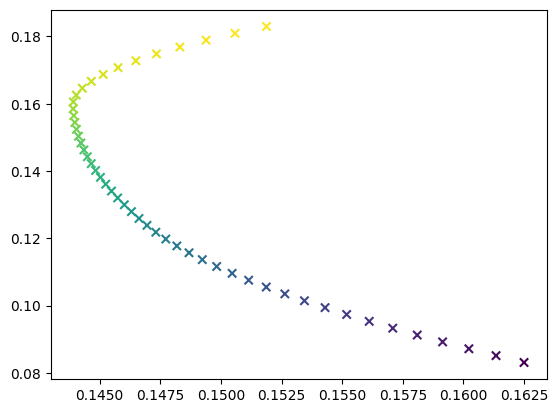

In [32]:
plt.scatter(minimal_volatilities,
            target_returns,
            c = (target_returns / minimal_volatilities),
            marker = 'x')



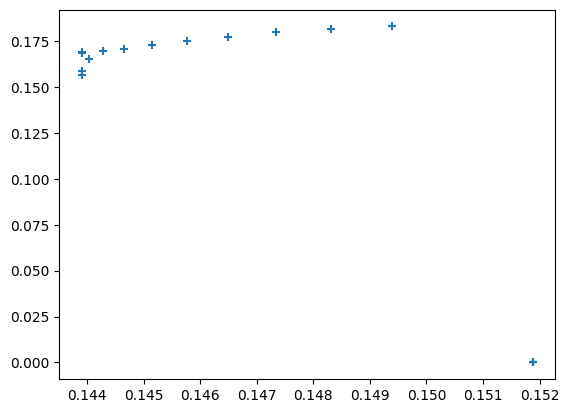

In [33]:
min_index = np.argmin(minimal_volatilities)
ex_returns = target_returns[min_index:]
ex_volatilities = minimal_volatilities[min_index:]

var = sci.splrep(ex_volatilities, ex_returns )
#plt.scatter(ex_volatilities,ex_returns)
plt.scatter(var[0],var[1],marker = '+')


   




In [34]:

def spline_value(x):
    # Spline value of the approximate efficient frontier
    #var - global variable [returns, vols]
    spline_approx = sci.splev(x,var,der=0)  
    return spline_approx

def d_spline_value(x):
    # first derivative of the approximate efficient frontier
    # var - global variable [returns, vols]
    deriv = sci.splev(x,var,der=1)
    return deriv

def eqs(p ):


    eq2 = spline_value(p)
    eq = (eq2 - rfr)/spline_value(p) -  d_spline_value(p)
    
    return  eq



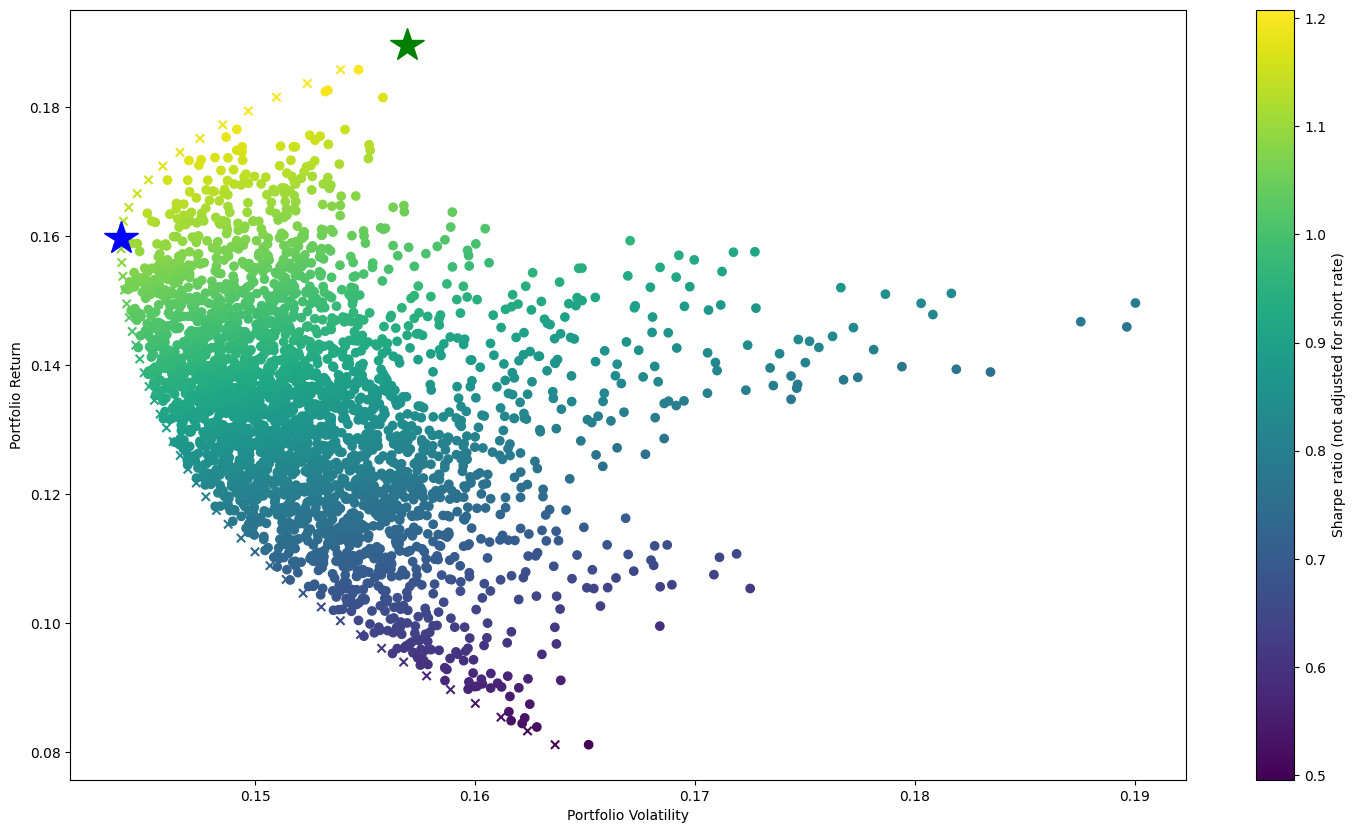

In [ ]:
# initialize figure size
plt.figure(figsize=(18,10))

#portfolios
plt.scatter(port_vols,
            port_returns,
            c = (port_returns / port_vols),
            marker = 'o')

#EF
plt.scatter(minimal_volatilities,
            target_returns,
            c = (target_returns / minimal_volatilities),
            marker = 'x')

#market portfolio
#the values needs to be manually adjusted from the optimisation above

#plt.plot(market_vol,market_return,
#         'r*',
#         markersize = 25.0)


#optimal sharp no rfr
plt.plot(portfolio_stats(optimal_sharpe_weights,returns)['volatility'],
         portfolio_stats(optimal_sharpe_weights,returns)['return'],
         'g*',
         markersize = 25.0)

#min variance
plt.plot(portfolio_stats(optimal_variance_weights,returns)['volatility'],
         portfolio_stats(optimal_variance_weights,returns)['return'],
         'b*',
         markersize = 25.0)


'''
ypoints = np.array([0.01,.1])
xpoints = np.array([0.,0.08])
plt.plot(xpoints, ypoints, linestyle = 'dotted',color='b')

ypoints = np.array([0.05,.111])
xpoints = np.array([0.,0.09])

plt.plot(xpoints, ypoints, linestyle = 'dotted',color='g')
'''

plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')
plt.colorbar(label='Sharpe ratio (not adjusted for short rate)')

